Binary

Iteration 0: J(w) = 0.6931471805599452
Iteration 100: J(w) = nan
Iteration 200: J(w) = nan
Iteration 300: J(w) = nan
Iteration 400: J(w) = nan
Iteration 500: J(w) = nan
Iteration 600: J(w) = nan
Iteration 700: J(w) = nan
Iteration 800: J(w) = nan
Iteration 900: J(w) = nan
Final weights: [2206.72945663]
Final cost: J(w) = nan


<ipython-input-1-8c1d2b922007>:30: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
<ipython-input-1-8c1d2b922007>:30: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


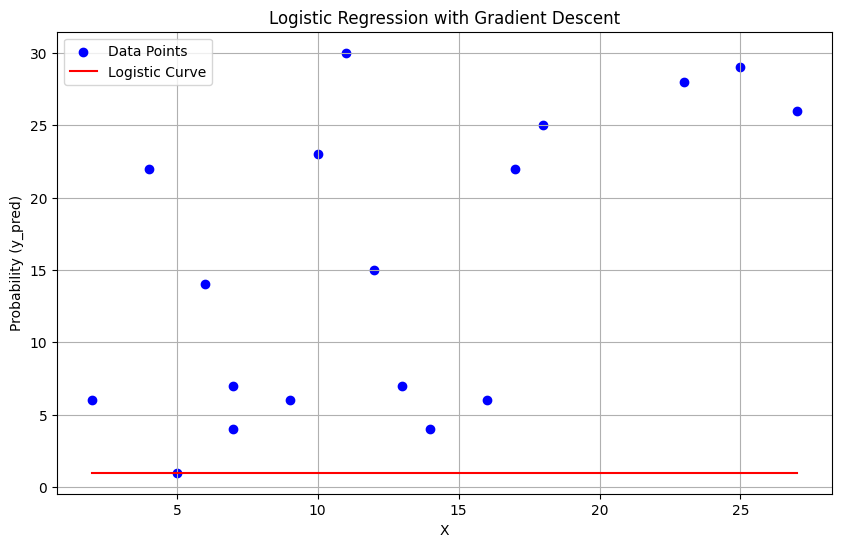

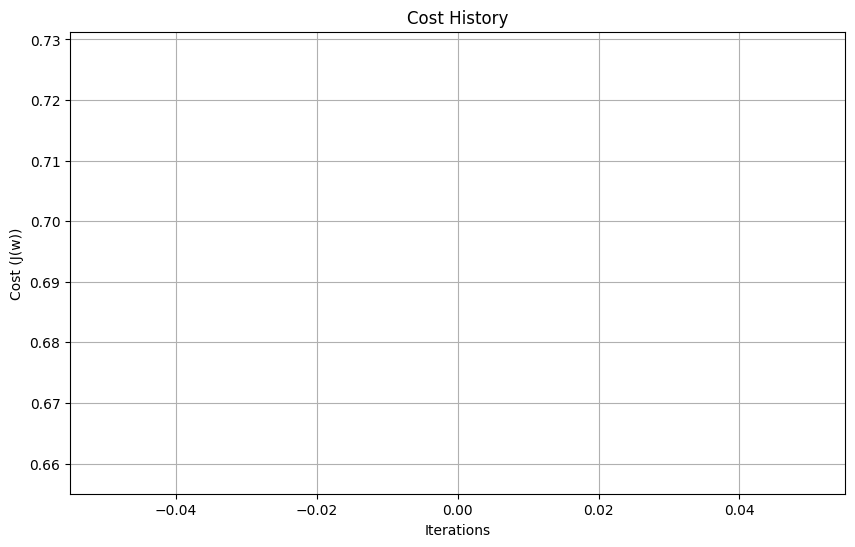

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from Excel file
file_path = '/content/svm (1).xlsx'
data = pd.read_excel(file_path)
X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values  # Binary target variable (0 or 1)

# Step 2: Initialize model parameters
num_iterations = 1000
learning_rate = 0.01
m = len(y)
n = X.shape[1]  # Number of features
w = np.zeros(n)  # Initialize weights as zeros

# Lists to store cost for plotting
cost_history = []

# Step 3: Implement gradient descent
for iteration in range(num_iterations):
    # Calculate logits (z)
    z = np.dot(X, w)

    # Calculate the predicted probabilities using the logistic function
    y_pred = 1 / (1 + np.exp(-z))

    # Calculate the cost (J(w)) using the cross-entropy loss
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost_history.append(cost)

    # Calculate the gradient
    gradient = (1 / m) * np.dot(X.T, (y_pred - y))

    # Update weights using the gradient
    w -= learning_rate * gradient

    # Print cost for every 100 iterations
    if iteration % 100 == 0:
        print(f'Iteration {iteration}: J(w) = {cost}')

# Step 4: Print the final weights and cost
print(f'Final weights: {w}')
print(f'Final cost: J(w) = {cost}')

# Step 5: Plot the logistic curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points', color='blue')

# Create a range of x values for the logistic curve
x_range = np.linspace(min(X), max(X), 100)
z_range = np.dot(x_range, w)
y_pred_range = 1 / (1 + np.exp(-z_range))

plt.plot(x_range, y_pred_range, label='Logistic Curve', color='red')
plt.xlabel('X')
plt.ylabel('Probability (y_pred)')
plt.title('Logistic Regression with Gradient Descent')
plt.legend()
plt.grid(True)

# Step 6: Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (J(w))')
plt.title('Cost History')
plt.grid(True)

plt.show()

Iteration 0: J(W) = 2.5649493574615367
Iteration 100: J(W) = 2.4844333729122092
Iteration 200: J(W) = 2.4844315834116215
Iteration 300: J(W) = 2.4844315824487024
Iteration 400: J(W) = 2.484431582448068
Iteration 500: J(W) = 2.484431582448068
Iteration 600: J(W) = 2.484431582448068
Iteration 700: J(W) = 2.484431582448068
Iteration 800: J(W) = 2.484431582448068
Iteration 900: J(W) = 2.484431582448068
Final weights: [[-0.07782117]
 [ 0.02105881]
 [ 0.03566969]
 [ 0.01815014]
 [-0.06338976]
 [-0.01393029]
 [ 0.02105881]
 [-0.02619943]
 [ 0.01178306]
 [ 0.03566969]
 [ 0.02641779]
 [ 0.03125886]
 [-0.0197262 ]]
Final cost: J(W) = 2.484431582448068


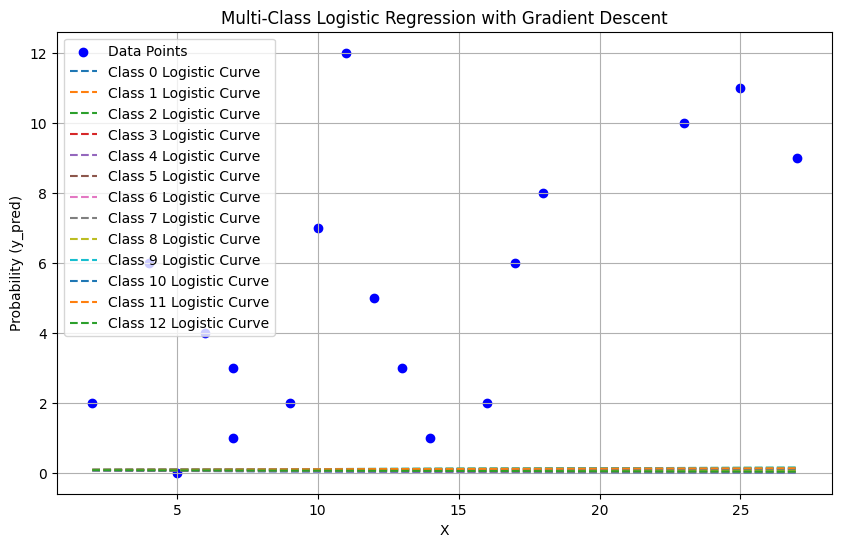

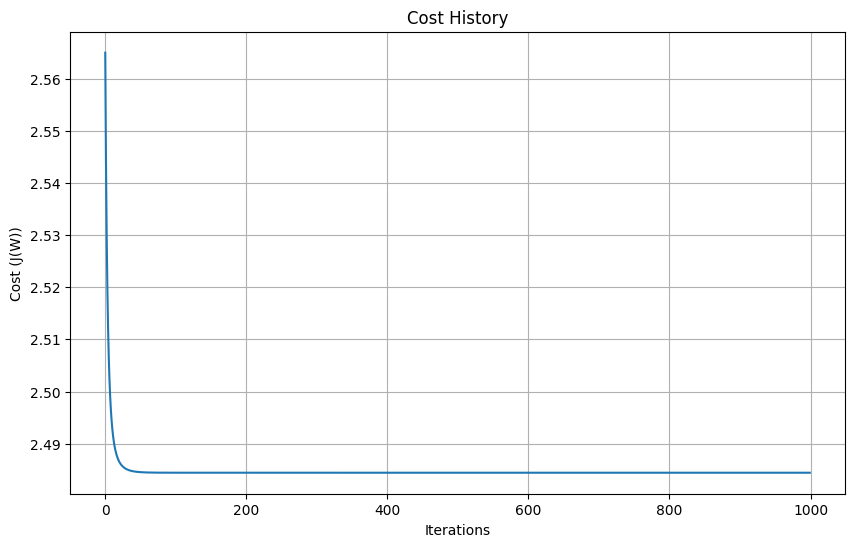

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from Excel file
file_path = '/content/svm (1).xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)
X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values  # Class labels (0, 1, 2, etc.)

# Step 2: Initialize model parameters
num_classes = len(np.unique(y))
num_iterations = 1000
learning_rate = 0.01
m = len(y)
n = X.shape[1]  # Number of features
W = np.zeros((num_classes, n))  # Initialize weights as zeros

# Lists to store cost for plotting
cost_history = []

# Convert class labels to class indices
class_indices = np.unique(y)
y_indices = np.searchsorted(class_indices, y)

# Step 3: Implement gradient descent
for iteration in range(num_iterations):
    # Calculate logits (Z) for all classes
    Z = np.dot(X, W.T)

    # Calculate the predicted probabilities using the softmax function
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    y_pred = exp_Z / exp_Z.sum(axis=1, keepdims=True)

    # Calculate the cost (J(W)) using the cross-entropy loss
    cost = (-1 / m) * np.sum(np.log(y_pred[range(m), y_indices]))
    cost_history.append(cost)

    # Calculate the gradient
    gradient = np.zeros((num_classes, n))
    for i in range(num_classes):
        gradient[i] = (1 / m) * np.dot(X.T, (y_pred[:, i] - (y_indices == i)))

    # Update weights using the gradient
    W -= learning_rate * gradient

    # Print cost for every 100 iterations
    if iteration % 100 == 0:
        print(f'Iteration {iteration}: J(W) = {cost}')

# Step 4: Print the final weights and cost
print(f'Final weights: {W}')
print(f'Final cost: J(W) = {cost}')

# Step 5: Plot the logistic curves for each class
plt.figure(figsize=(10, 6))
plt.scatter(X, y_indices, label='Data Points', color='blue')

# Create a range of x values for the logistic curves
x_range = np.linspace(min(X), max(X), 100)
Z_range = np.dot(x_range, W.T)
y_pred_range = np.exp(Z_range - np.max(Z_range, axis=1, keepdims=True)) / np.exp(Z_range - np.max(Z_range, axis=1, keepdims=True)).sum(axis=1, keepdims=True)

for i in range(num_classes):
    plt.plot(x_range, y_pred_range[:, i], label=f'Class {i} Logistic Curve', linestyle='--')

plt.xlabel('X')
plt.ylabel('Probability (y_pred)')
plt.title('Multi-Class Logistic Regression with Gradient Descent')
plt.legend()
plt.grid(True)

# Step 6: Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (J(W))')
plt.title('Cost History')
plt.grid(True)

plt.show()
